In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lazypredict.Supervised import LazyRegressor, LazyClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Phân tích số liệu/Data/diabetes.csv", delimiter=",")

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Distribution Outcome')

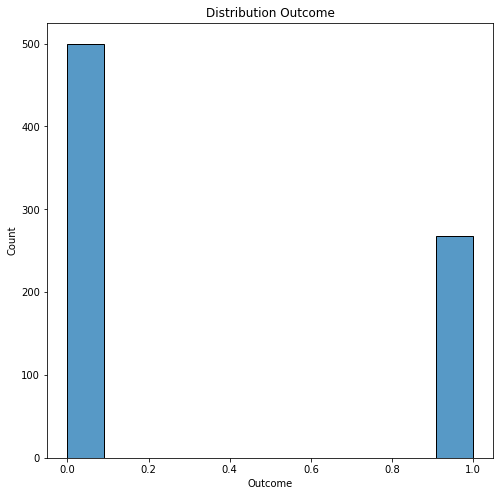

In [ ]:
plt.figure(figsize=(8, 8))
sns.histplot(data['Outcome'])
plt.title('Distribution Outcome')

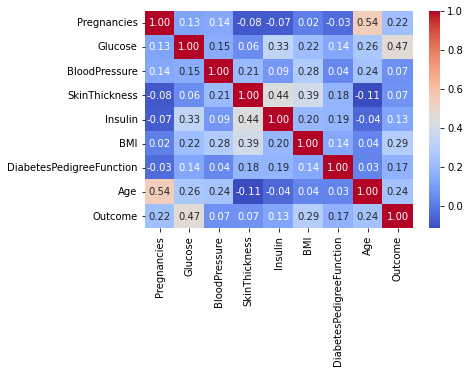

In [ ]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')

In [ ]:
# Set features and target
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [ ]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Train 1 model
clf = SVC()
clf.fit(x_train, y_train)
# Run prediction on test set
y_predict = clf.predict(x_test)
# Metrics report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



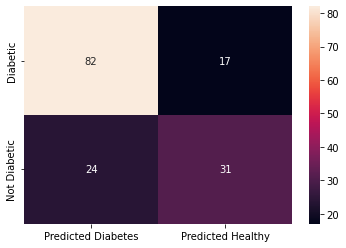

In [ ]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=["Diabetic", "Not Diabetic"], columns=["Predicted Diabetes", "Predicted Healthy"])
sns.heatmap(confusion, annot=True, fmt="g")

In [ ]:
# USE GridSearchCV (FOR SMALL NUMBER OF COMBINATIONS)

param_grid = {'n_estimators': [100, 200],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [5, 10],
              'min_samples_split': [10, 50],
              'min_samples_leaf': [2, 5]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)
grid_search.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
y_predict = grid_search.predict(x_test)
print("GridSearchCV's report:")
print(classification_report(y_test, y_predict))


Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
GridSearchCV's report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# USE RandomizedSearchCV (FOR LARGE NUBMER OF COMBINATIONS)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 10, 20, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Random search of parameters, using 5-fold cross validation, search across 100 different combinations

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=random_grid,
                        scoring='neg_mean_squared_error', n_iter=10, cv=5,
                        verbose=1, random_state=42, n_jobs=1)
random_search.fit(x_train, y_train)
print("Best parameters: {}".format(random_search.best_params_))
y_predict = random_search.predict(x_test)
print("RandomizedSearchCV's report:")
print(classification_report(y_test, y_predict))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 20}
RandomizedSearchCV's report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
# SEARCH FOR ALL REGRESSORS
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 17.97it/s]


In [ ]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.78               0.76     0.76      0.78   
GaussianNB                         0.77               0.75     0.75      0.77   
RidgeClassifierCV                  0.77               0.75     0.75      0.77   
XGBClassifier                      0.76               0.74     0.74      0.76   
DecisionTreeClassifier             0.75               0.74     0.74      0.75   
LinearDiscriminantAnalysis         0.76               0.74     0.74      0.76   
RidgeClassifier                    0.76               0.74     0.74      0.76   
LinearSVC                          0.75               0.74     0.74      0.75   
LogisticRegression                 0.75               0.74     0.74      0.75   
CalibratedClassifierCV             0.75               0.73     0.73      0.75   
LGBMClassifier              